In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load data
df = pd.read_csv('../data/diabetes_012_health_indicators_BRFSS2015.csv')

# Dataset Information

In [4]:
# Preview of data
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
# Number of columns and samples
columns = len(df.columns)
samples = len(df)
print(f"No. of Columns: {columns}")
print(f"No. of Samples: {samples}")

No. of Columns: 22
No. of Samples: 253680


In [6]:
# Basic statistics of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
# Drop columns which are not related to the health indicators
df.drop(columns=["Education", "Income"], inplace=True)

# Dataset Visualisation

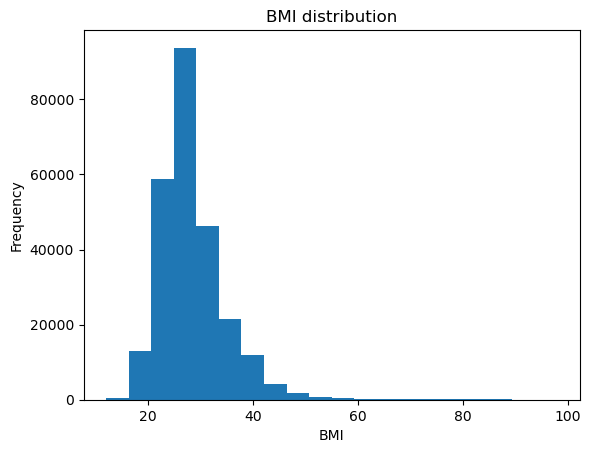

In [8]:
# BMI Distribution
plot = df["BMI"].hist(bins=20)
plot.set_title('BMI distribution')
plot.set_xlabel('BMI')
plot.set_ylabel('Frequency')
plot.grid(False)
plt.show()

In [9]:
# Find Null Values
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

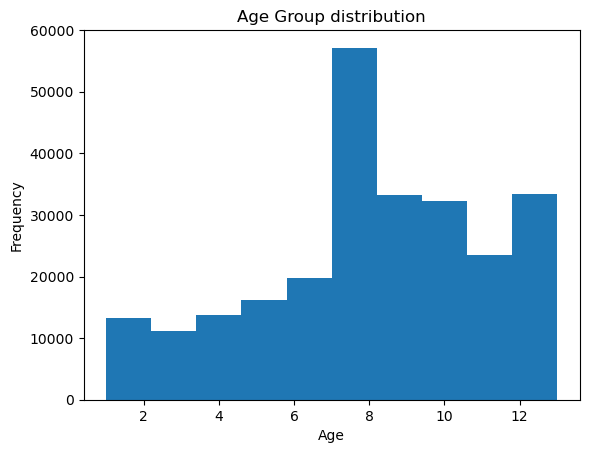

In [10]:
# Age Group Distribution
plot = df["Age"].hist()
plot.set_title('Age Group distribution')
plot.set_xlabel('Age')
plot.set_ylabel('Frequency')
plot.grid(False)
plt.show()

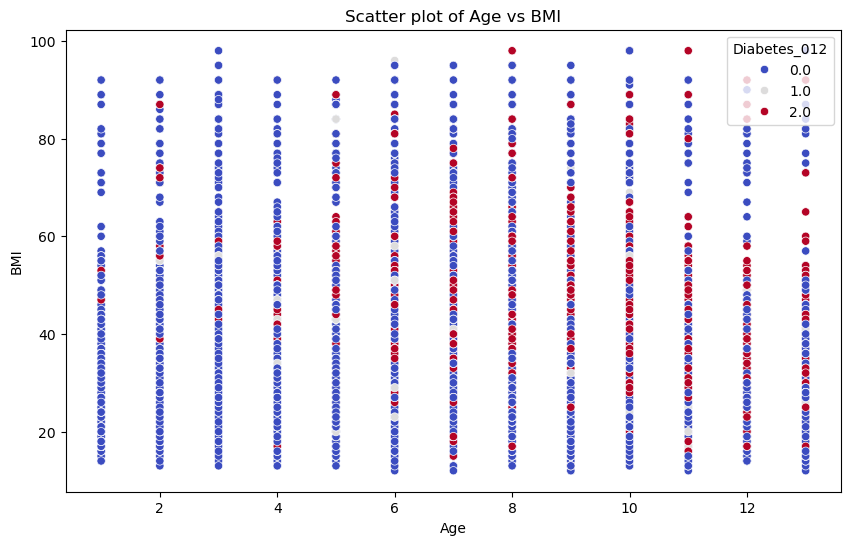

In [11]:
# Scatter plot for Age vs BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='BMI', hue='Diabetes_012', palette='coolwarm')
plt.title('Scatter plot of Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

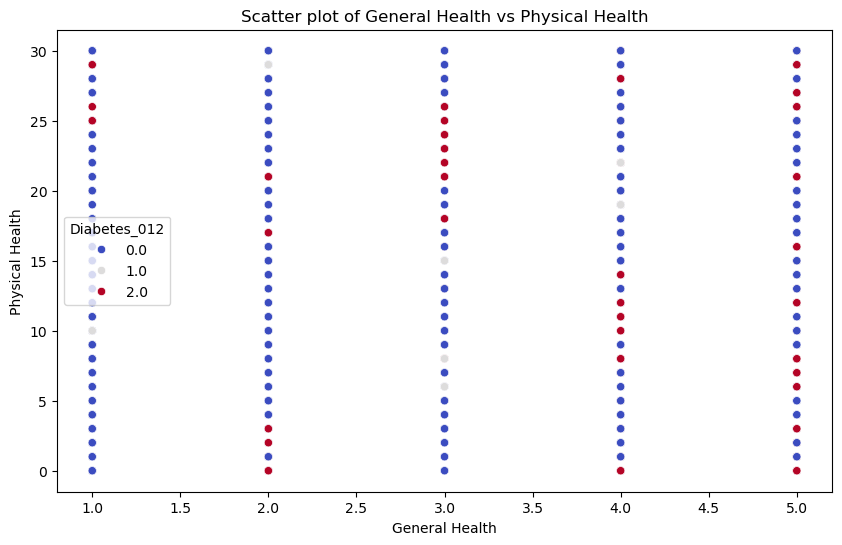

In [12]:
# Scatter plot for General Health vs Physical Health
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GenHlth', y='PhysHlth', hue='Diabetes_012', palette='coolwarm')
plt.title('Scatter plot of General Health vs Physical Health')
plt.xlabel('General Health')
plt.ylabel('Physical Health')
plt.show()

In [13]:
# Find correlation data
corr = df.corr() 
corr

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
Diabetes_012,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,-0.058972,-0.057882,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547


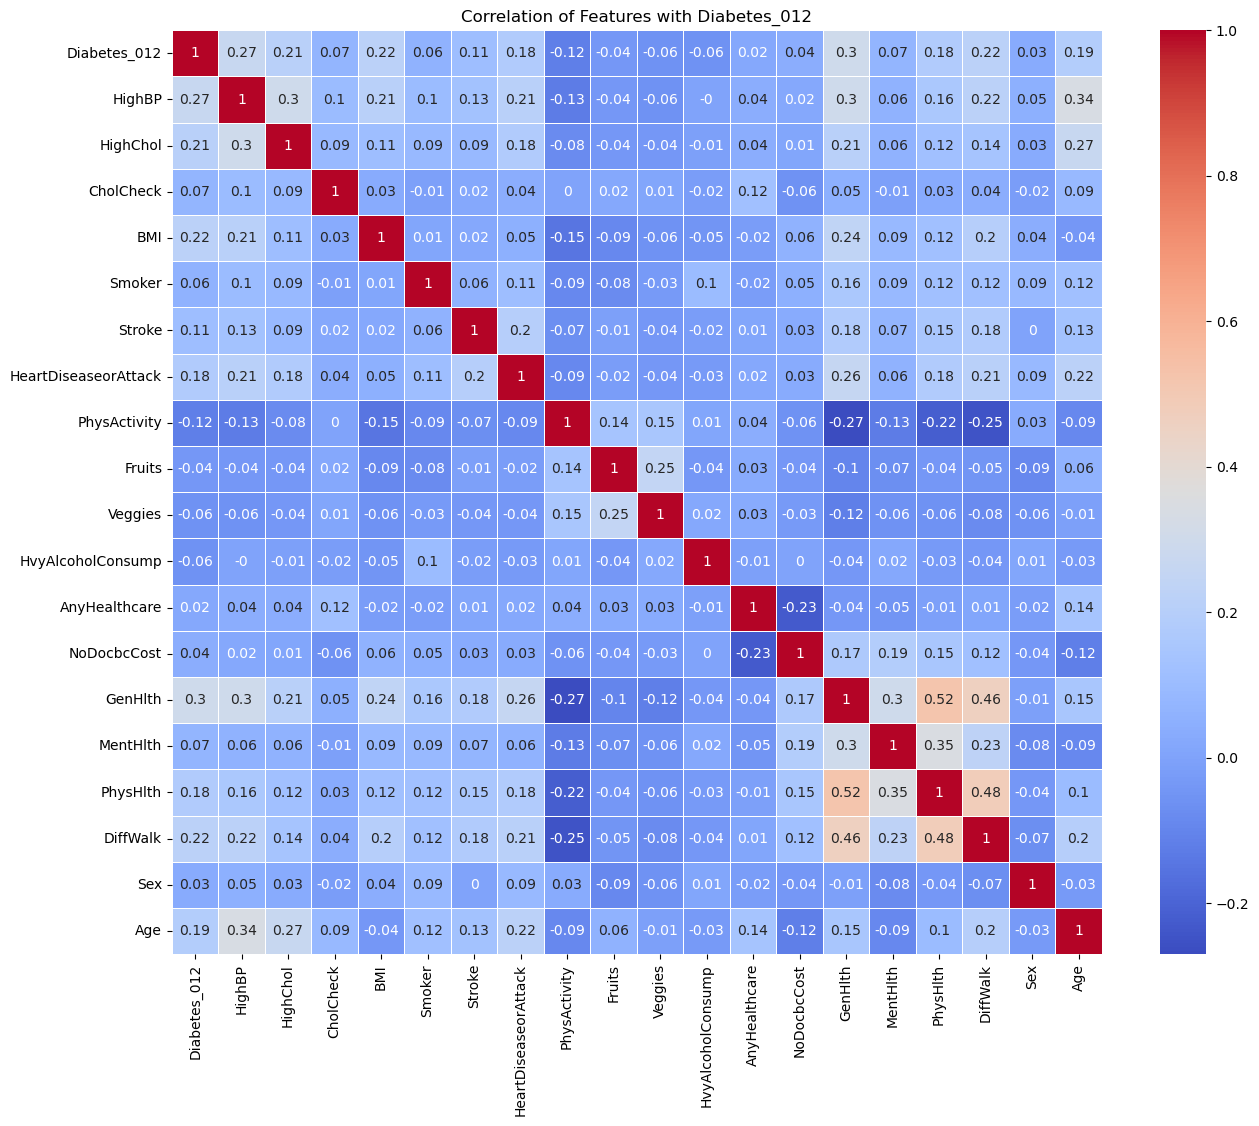

In [14]:
# Correlation Heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr.map(lambda x: round(x, 2)), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Diabetes_012')
plt.show()

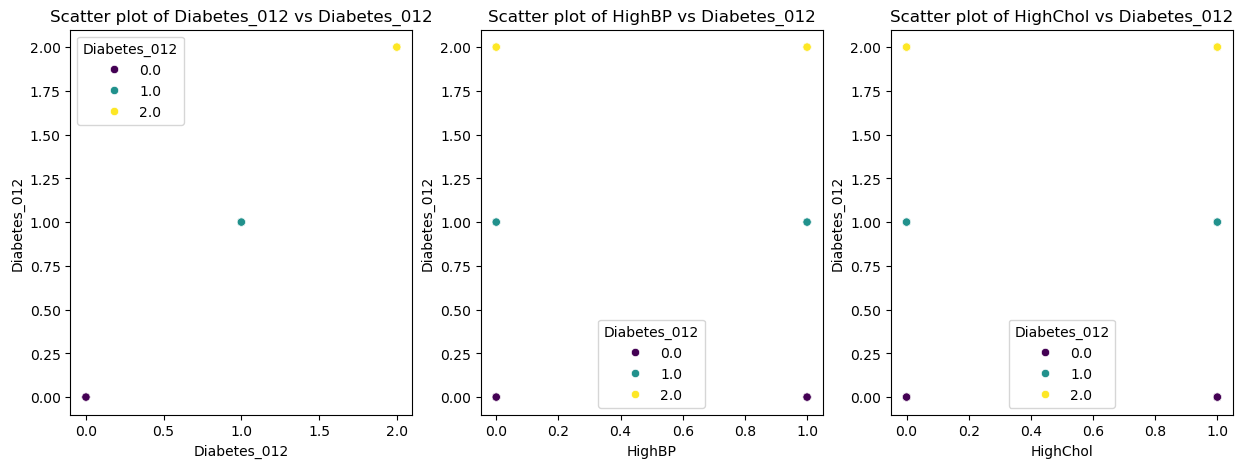

In [15]:
# Get the top 3 most correlated features with Diabetes_012
top_features = corr.head(3).index

# Plot scatterplots for the top 3 features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=feature, y='Diabetes_012', hue='Diabetes_012', palette='viridis')
    plt.title(f'Scatter plot of {feature} vs Diabetes_012')
    plt.xlabel(feature)
    plt.ylabel('Diabetes_012')

plt.show()

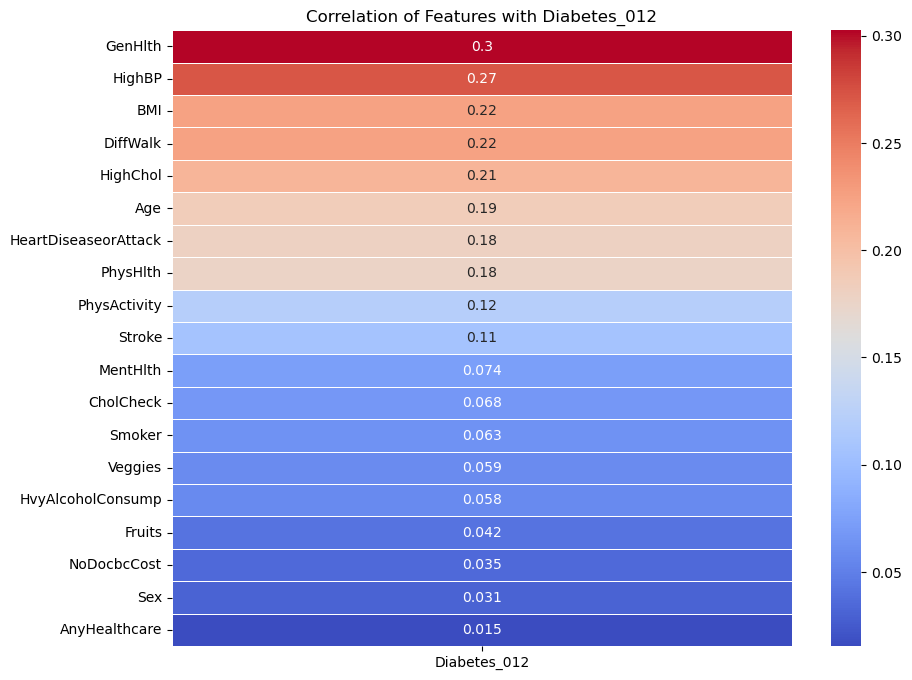

In [16]:
# Correlation of Features with Diabetes_012
clean_corr = corr[['Diabetes_012']].drop(labels=["Diabetes_012"], axis=0).map(lambda x: abs(x)).sort_values(by='Diabetes_012', ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(clean_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Diabetes_012')
plt.show()

In [17]:
# Get most related columns
clean_df = corr[['Diabetes_012']].drop(labels=["Diabetes_012"], axis=0)
clean_df = clean_df[abs(clean_df["Diabetes_012"]) > 0.1]
related_columns = [*clean_df.index]
related_columns

['HighBP',
 'HighChol',
 'BMI',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'GenHlth',
 'PhysHlth',
 'DiffWalk',
 'Age']

# Preprocessing

In [18]:
from sklearn.model_selection import train_test_split

# Load data
X = df.drop(columns=["Diabetes_012"])
y = df["Diabetes_012"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
# Load data from the most related columns
X_spec = df.drop(columns=["Diabetes_012", *[c for c in df.columns if c not in related_columns]])
y_spec = df["Diabetes_012"]

# Split data into training and testing sets
X_spec_train, X_spec_test, y_spec_train, y_spec_test = train_test_split(X, y, test_size=0.3)

# Model Training

### Model Evaluation Metrics

When evaluating the performance of a machine learning model, several metrics are used to understand how well the model is performing. Below are the explanations of the key metrics used:

#### **Accuracy**
- **Definition**: The ratio of correctly predicted instances to the total instances.
- **Formula**:  
  $$
  \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Instances}}
  $$
- **Interpretation**: It gives the overall effectiveness of the model. However, it can be misleading if the dataset is imbalanced.

#### **Precision**
- **Definition**: The ratio of correctly predicted positive instances to the total predicted positives.
- **Formula**:  
  $$
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  $$
- **Interpretation**: It indicates how many of the instances predicted as positive are actually positive. High precision means low false positive rate.

#### **Recall**
- **Definition**: The ratio of correctly predicted positive instances to all instances that are actually positive.
- **Formula**:  
  $$
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  $$
- **Interpretation**: It shows how many of the actual positive instances were correctly identified by the model. High recall means low false negative rate.

#### **F1 Score**
- **Definition**: The harmonic mean of precision and recall.
- **Formula**:  
  $$
  \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$
- **Interpretation**: It provides a balance between precision and recall. It is useful when the class distribution is imbalanced.

#### **Confusion Matrix**
- **Definition**: A table used to describe the performance of a classification model. It shows the actual versus predicted classifications.
- **Components**:
    - **True Positives (TP)**: Correctly predicted positive instances.
    - **True Negatives (TN)**: Correctly predicted negative instances.
    - **False Positives (FP)**: Incorrectly predicted positive instances.
    - **False Negatives (FN)**: Incorrectly predicted negative instances.
- **Interpretation**: It provides a detailed breakdown of correct and incorrect classifications, which helps in understanding the types of errors the model is making.

#### **Classification Report**
- **Definition**: A detailed report showing the precision, recall, F1 score, and support for each class.
- **Components**:
    - **Precision**: As defined above.
    - **Recall**: As defined above.
    - **F1 Score**: As defined above.
    - **Support**: The number of actual occurrences of each class in the dataset.
- **Interpretation**: It provides a comprehensive view of the model's performance across all classes.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define a function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # get accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # get precision
    precision = precision_score(y_test, y_pred, average='weighted')
    
    # get recall
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # get f1 score
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=np.nan)
    
    # get confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # get classification report
    report = classification_report(y_test, y_pred)
    
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": cm,
        "Classification Report": report
    }
    
    return metrics

In [ ]:
# format metrics output as string
def format_metrics(metrics):
    result = ""

    for metric, value in metrics.items():
        result += f"{metric}: {'\n' if metric == 'Confusion Matrix' or metric == 'Classification Report' else ''} {value}"
        result += "\n"
        
    return result

In [48]:
from sklearn.utils.validation import check_is_fitted

# check if model has been fitted
def is_model_fitted(model):
    try:
        check_is_fitted(model)
        return True
    except:
        return False

In [23]:
# Define a function to train and evaluate the model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    if not is_model_fitted(model):
        model.fit(X_train, y_train)
    
    metrics = evaluate_model(model, X_test, y_test)
    result = format_metrics(metrics)
        
    return metrics, result

In [46]:
# plot confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [47]:
import joblib

# save full model weights to disk
def save_model(model, filename=None):
    joblib.dump(model, filename)

## Logistic Regression

### Testing across all features

In [24]:
from sklearn.linear_model import LogisticRegression

# Load Logistic Regression model
if not 'lr_model' in locals():
    lr_model = LogisticRegression(max_iter=1000)
    
metrics, results = train_and_evaluate_model(lr_model, X_train, y_train, X_test, y_test)
print(results)

Accuracy:  0.8472353621360244
Precision:  0.7997856843154805
Recall:  0.8472353621360244
F1 Score:  0.8089190930266794
Confusion Matrix: 
 [[62638     0  1578]
 [ 1327     0   115]
 [ 8606     0  1840]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     64216
         1.0       0.00      0.00      0.00      1442
         2.0       0.52      0.18      0.26     10446

    accuracy                           0.85     76104
   macro avg       0.46      0.38      0.39     76104
weighted avg       0.80      0.85      0.81     76104




In [36]:
save_model(lr_model, '../models/lr_full.joblib')

### Testing across features with correlation scores of >|0.1|

In [25]:
# Load Logistic Regression model
if not 'lr_spec_model' in locals():
    lr_spec_model = LogisticRegression(max_iter=1000)

metrics, results = train_and_evaluate_model(lr_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test)
print(results)

Accuracy:  0.8484442342058236
Precision:  0.801667792009788
Recall:  0.8484442342058236
F1 Score:  0.8092784208462256
Confusion Matrix: 
 [[62791     0  1462]
 [ 1285     0   107]
 [ 8680     0  1779]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     64253
         1.0       0.00      0.00      0.00      1392
         2.0       0.53      0.17      0.26     10459

    accuracy                           0.85     76104
   macro avg       0.46      0.38      0.39     76104
weighted avg       0.80      0.85      0.81     76104




In [37]:
save_model(lr_spec_model, '../models/lr_spec.joblib')

## K-Nearest Neighbours

### Testing across all features

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Load K-Nearest Neighbors model
if not 'kn_model' in locals():
    kn_model = KNeighborsClassifier()

metrics, results = train_and_evaluate_model(kn_model, X_train, y_train, X_test, y_test)
print(results)

Accuracy:  0.8325712183328078
Precision:  0.7868119838590568
Recall:  0.8325712183328078
F1 Score:  0.8033211309962673
Confusion Matrix: 
 [[61179    33  3004]
 [ 1259     2   181]
 [ 8235    30  2181]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     64216
         1.0       0.03      0.00      0.00      1442
         2.0       0.41      0.21      0.28     10446

    accuracy                           0.83     76104
   macro avg       0.43      0.39      0.40     76104
weighted avg       0.79      0.83      0.80     76104




In [41]:
save_model(kn_model, '../models/kn_full.joblib')

### Testing across features with correlation scores of >|0.1|

In [27]:
# Load K-Nearest Neighbors model
if not 'kn_spec_model' in locals():
    kn_spec_model = KNeighborsClassifier()

metrics, results = train_and_evaluate_model(kn_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test)
print(results)

Accuracy:  0.835054662041417
Precision:  0.7891853003816771
Recall:  0.835054662041417
F1 Score:  0.8046649413022221
Confusion Matrix: 
 [[61436    33  2784]
 [ 1214     4   174]
 [ 8314    34  2111]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     64253
         1.0       0.06      0.00      0.01      1392
         2.0       0.42      0.20      0.27     10459

    accuracy                           0.84     76104
   macro avg       0.45      0.39      0.40     76104
weighted avg       0.79      0.84      0.80     76104




In [39]:
save_model(kn_spec_model, '../models/kn_spec.joblib')

## Decision Tree Classifier

### Testing across all features

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Load Decision Tree model
if not 'dt_model' in locals():
    dt_model = DecisionTreeClassifier()

metrics, results = train_and_evaluate_model(dt_model, X_train, y_train, X_test, y_test)
print(results)

Accuracy:  0.780418900452013
Precision:  0.7807162037961913
Recall:  0.780418900452013
F1 Score:  0.7805674457085316
Confusion Matrix: 
 [[56169  1084  6963]
 [ 1087    51   304]
 [ 6935   338  3173]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.87     64216
         1.0       0.03      0.04      0.03      1442
         2.0       0.30      0.30      0.30     10446

    accuracy                           0.78     76104
   macro avg       0.40      0.40      0.40     76104
weighted avg       0.78      0.78      0.78     76104




In [42]:
save_model(dt_model, '../models/dt_full.joblib')

### Testing across features with correlation scores of >|0.1|

In [29]:
# Load Decision Tree model
if not 'dt_spec_model' in locals():
    dt_spec_model = DecisionTreeClassifier()
    
metrics, results = train_and_evaluate_model(dt_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test)
print(results)

Accuracy:  0.7852412488174078
Precision:  0.7849668685747487
Recall:  0.7852412488174078
F1 Score:  0.785095641143453
Confusion Matrix: 
 [[56481  1115  6657]
 [ 1043    41   308]
 [ 6841   380  3238]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88     64253
         1.0       0.03      0.03      0.03      1392
         2.0       0.32      0.31      0.31     10459

    accuracy                           0.79     76104
   macro avg       0.41      0.41      0.41     76104
weighted avg       0.78      0.79      0.79     76104




In [43]:
save_model(dt_spec_model, '../models/dt_spec.joblib')

## Random Forest Classifier

### Testing across all features

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Load Random Forest model
if not 'rf_model' in locals():
    rf_model = RandomForestClassifier()
    
metrics, results = train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test)
print(results)

Accuracy:  0.8347261641963629
Precision:  0.791563085461383
Recall:  0.8347261641963629
F1 Score:  0.8065542958289275
Confusion Matrix: 
 [[61213   109  2894]
 [ 1248     7   187]
 [ 8111    29  2306]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     64216
         1.0       0.05      0.00      0.01      1442
         2.0       0.43      0.22      0.29     10446

    accuracy                           0.83     76104
   macro avg       0.45      0.39      0.40     76104
weighted avg       0.79      0.83      0.81     76104




### Testing across features with correlation scores of >|0.1|

In [31]:
# Load Decision Tree model
if not 'rf_spec_model' in locals():
    rf_spec_model = RandomForestClassifier()
    
metrics, results = train_and_evaluate_model(rf_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test)
print(results)

Accuracy:  0.836237254283612
Precision:  0.7929352818368869
Recall:  0.836237254283612
F1 Score:  0.8076598168711212
Confusion Matrix: 
 [[61357   119  2777]
 [ 1218     4   170]
 [ 8142    37  2280]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     64253
         1.0       0.03      0.00      0.01      1392
         2.0       0.44      0.22      0.29     10459

    accuracy                           0.84     76104
   macro avg       0.44      0.39      0.40     76104
weighted avg       0.79      0.84      0.81     76104




In [50]:
import csv
import os

def save_metrics(metrics, directory_name):
    # Create directory if it doesn't exist
    if not os.path.exists(directory_name):
        os.makedirs(directory_name)
    
    # Save general metrics to CSV
    general_metrics_file = os.path.join(directory_name, 'general_metrics.csv')
    with open(general_metrics_file, mode='w+', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Metric", "Value"])
        for metric, value in metrics.items():
            if metric not in ["Confusion Matrix", "Classification Report"]:
                writer.writerow([metric, value])
    
    # Save confusion matrix to CSV
    confusion_matrix_file = os.path.join(directory_name, 'confusion_matrix.csv')
    with open(confusion_matrix_file, mode='w+', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Confusion Matrix"])
        for row in metrics["Confusion Matrix"]:
            writer.writerow(row)
    
    # Save classification report to CSV
    classification_report_file = os.path.join(directory_name, 'classification_report.csv')
    with open(classification_report_file, mode='w+', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Classification Report"])
        report_lines = metrics["Classification Report"].split('\n')
        for line in report_lines:
            writer.writerow([line])

In [53]:
# Define a list of models to compare
models = [
    ("lr", lr_model, X_test, y_test, lr_spec_model, X_spec_test, y_spec_test),
    ("kn", kn_model, X_test, y_test, kn_spec_model, X_spec_test, y_spec_test),
    ("dt", dt_model, X_test, y_test, dt_spec_model, X_spec_test, y_spec_test),
    ("rf", rf_model, X_test, y_test, rf_spec_model, X_spec_test, y_spec_test)
]

# Compare the models
comparison_results = {}
for name, model, X_test, y_test, spec_model, X_spec_test, y_spec_test in models:
    metrics = evaluate_model(model, X_test, y_test)
    result = format_metrics(metrics)
    spec_metrics = evaluate_model(spec_model, X_spec_test, y_spec_test)
    spec_result = format_metrics(spec_metrics)
    
    comparison_results[name] = {
        "General Model": metrics,
        "Specific Model": spec_metrics
    }
    
    print(f"Results for {name} (General Model):\n{result}\n")
    print(f"Results for {name} (Specific Model):\n{spec_result}\n")

Results for lr (General Model):
Accuracy:  0.8472353621360244
Precision:  0.7997856843154805
Recall:  0.8472353621360244
F1 Score:  0.8089190930266794
Confusion Matrix: 
 [[62638     0  1578]
 [ 1327     0   115]
 [ 8606     0  1840]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     64216
         1.0       0.00      0.00      0.00      1442
         2.0       0.52      0.18      0.26     10446

    accuracy                           0.85     76104
   macro avg       0.46      0.38      0.39     76104
weighted avg       0.80      0.85      0.81     76104



Results for lr (Specific Model):
Accuracy:  0.8484442342058236
Precision:  0.801667792009788
Recall:  0.8484442342058236
F1 Score:  0.8092784208462256
Confusion Matrix: 
 [[62791     0  1462]
 [ 1285     0   107]
 [ 8680     0  1779]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.9

In [55]:
from tqdm import tqdm

# Save all metrics to CSV files
for name, model, X_test, y_test, spec_model, X_spec_test, y_spec_test in tqdm(models):
    # General model metrics
    metrics = evaluate_model(model, X_test, y_test)
    save_metrics(metrics, f'../results/{name.lower().replace(" ", "_")}_full')
    
    # Specific model metrics
    spec_metrics = evaluate_model(spec_model, X_spec_test, y_spec_test)
    save_metrics(spec_metrics, f'../results/{name.lower().replace(" ", "_")}_spec')

100%|██████████| 4/4 [01:02<00:00, 15.72s/it]
